In [1]:
import pandas as pd
import re
from collections import Counter
from textblob import TextBlob

In [2]:
#pip install textblob

In [3]:
df = pd.read_csv('C:/Users/jose/Downloads/ProjectTweets.csv').reset_index(drop=True)

In [4]:
df.head()

0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  1  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  2  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  3  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  4  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  5  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no, it's not behaving at all....                                                                   
4                      @Kwesidei not the whole crew

In [5]:
# Naming new headers
headers = ['ids','tweet_id' ,'date', 'flag', 'user', 'tweet']

# Assigning them
df.columns = headers

# Display df
df.head()

ids    tweet_id                          date      flag           user  \
0    1  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1    2  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2    3  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3    4  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4    5  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                               tweet  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew

In [6]:
# Display the first few rows of the dataset and a summary of the data
df.head(), df.describe(include='all'), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   ids       1599999 non-null  int64 
 1   tweet_id  1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   flag      1599999 non-null  object
 4   user      1599999 non-null  object
 5   tweet     1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


(   ids    tweet_id                          date      flag           user  \
 0    1  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
 1    2  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
 2    3  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
 3    4  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
 4    5  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   
 
                                                tweet  
 0  is upset that he can't update his Facebook by ...  
 1  @Kenichan I dived many times for the ball. Man...  
 2    my whole body feels itchy and like its on fire   
 3  @nationwideclass no, it's not behaving at all....  
 4                      @Kwesidei not the whole crew   ,
                  ids      tweet_id                          date      flag  \
 count   1.599999e+06  1.599999e+06                       1599999   1599999   
 unique           NaN           NaN

In [7]:
# Check if all values in the 'tweet_id' column are unique
are_unique = df['tweet_id'].is_unique

are_unique

False

In [8]:
# Find duplicate 'tweet_id' entries
duplicates = df[df.duplicated('tweet_id', keep=False)].sort_values('tweet_id')
# Set display options
pd.set_option('display.max_rows', None)  # Replace None with the number of rows you want to display
duplicates

ids    tweet_id                          date      flag  \
212          213  1467863684  Mon Apr 06 22:33:35 PDT 2009  NO_QUERY   
800260    800261  1467863684  Mon Apr 06 22:33:35 PDT 2009  NO_QUERY   
274          275  1467880442  Mon Apr 06 22:38:04 PDT 2009  NO_QUERY   
800299    800300  1467880442  Mon Apr 06 22:38:04 PDT 2009  NO_QUERY   
988          989  1468053611  Mon Apr 06 23:28:09 PDT 2009  NO_QUERY   
801279    801280  1468053611  Mon Apr 06 23:28:09 PDT 2009  NO_QUERY   
1176        1177  1468100580  Mon Apr 06 23:42:57 PDT 2009  NO_QUERY   
801572    801573  1468100580  Mon Apr 06 23:42:57 PDT 2009  NO_QUERY   
1253        1254  1468115720  Mon Apr 06 23:48:00 PDT 2009  NO_QUERY   
801649    801650  1468115720  Mon Apr 06 23:48:00 PDT 2009  NO_QUERY   
1332        1333  1468131748  Mon Apr 06 23:53:22 PDT 2009  NO_QUERY   
801793    801794  1468131748  Mon Apr 06 23:53:22 PDT 2009  NO_QUERY   
1476        1477  1468161883  Tue Apr 07 00:03:10 PDT 2009  NO_QUERY   
801960    801961  1468161883  Tue Apr 07 00:03:10 PDT 2009  NO_QUERY   
802396    802397  1468224250  Tue Apr 07 00:23:49 PDT 2009  NO_QUERY   
1751        1752  1468224250  Tue Apr 07 00:23:49 PDT 2009  NO_QUERY   
802974    802975  1468310350  Tue Apr 07 00:53:48 PDT 2009  NO_QUERY   
2126        2127  1468310350  Tue Apr 07 00:53:48 PDT 2009  NO_QUERY   
803175    803176  1468338634  Tue Apr 07 01:03:49 PDT 2009  NO_QUERY   
2251        2252  1468338634  Tue Apr 07 01:03:49 PDT 2009  NO_QUERY   
803300    803301  1468363676  Tue Apr 07 01:12:56 PDT 2009  NO_QUERY   
2374        2375  1468363676  Tue Apr 07 01:12:56 PDT 2009  NO_QUERY   
3028        3029  1468502040  Tue Apr 07 02:03:41 PDT 2009  NO_QUERY   
804315    804316  1468502040  Tue Apr 07 02:03:41 PDT 2009  NO_QUERY   
3038        3039  1468503801  Tue Apr 07 02:04:18 PDT 2009  NO_QUERY   
804348    804349  1468503801  Tue Apr 07 02:04:18 PDT 2009  NO_QUERY   
3211        3212  1468544973  Tue Apr 07 02:19:32 PDT 2009  NO_QUERY   
804655    804656  1468544973  Tue Apr 07 02:19:32 PDT 2009  NO_QUERY   
3399        3400  1468586841  Tue Apr 07 02:34:25 PDT 2009  NO_QUERY   
804928    804929  1468586841  Tue Apr 07 02:34:25 PDT 2009  NO_QUERY   
805254    805255  1468639063  Tue Apr 07 02:53:24 PDT 2009  NO_QUERY   
3631        3632  1468639063  Tue Apr 07 02:53:24 PDT 2009  NO_QUERY   
3697        3698  1468652839  Tue Apr 07 02:58:23 PDT 2009  NO_QUERY   
805340    805341  1468652839  Tue Apr 07 02:58:23 PDT 2009  NO_QUERY   
805805    805806  1468714181  Tue Apr 07 03:19:34 PDT 2009  NO_QUERY   
3970        3971  1468714181  Tue Apr 07 03:19:34 PDT 2009  NO_QUERY   
4170        4171  1468758512  Tue Apr 07 03:34:37 PDT 2009  NO_QUERY   
806090    806091  1468758512  Tue Apr 07 03:34:37 PDT 2009  NO_QUERY   
806506    806507  1468833927  Tue Apr 07 03:58:41 PDT 2009  NO_QUERY   
4479        4480  1468833927  Tue Apr 07 03:58:41 PDT 2009  NO_QUERY   
5115        5116  1468992236  Tue Apr 07 04:44:49 PDT 2009  NO_QUERY   
807441    807442  1468992236  Tue Apr 07 04:44:49 PDT 2009  NO_QUERY   
5184        5185  1469011145  Tue Apr 07 04:49:48 PDT 2009  NO_QUERY   
807542    807543  1469011145  Tue Apr 07 04:49:48 PDT 2009  NO_QUERY   
6024        6025  1469267615  Tue Apr 07 05:49:29 PDT 2009  NO_QUERY   
808644    808645  1469267615  Tue Apr 07 05:49:29 PDT 2009  NO_QUERY   
809638    809639  1469531660  Tue Apr 07 06:39:53 PDT 2009  NO_QUERY   
6729        6730  1469531660  Tue Apr 07 06:39:53 PDT 2009  NO_QUERY   
809948    809949  1469618724  Tue Apr 07 06:55:21 PDT 2009  NO_QUERY   
6946        6947  1469618724  Tue Apr 07 06:55:21 PDT 2009  NO_QUERY   
810194    810195  1469702025  Tue Apr 07 07:10:03 PDT 2009  NO_QUERY   
7164        7165  1469702025  Tue Apr 07 07:10:03 PDT 2009  NO_QUERY   
7956        7957  1470013783  Tue Apr 07 08:05:26 PDT 2009  NO_QUERY   
811251    811252  1470013783  Tue Apr 07 08:05:26 PDT 2009  NO_QUERY   
811257    811258  1470014082  Tue Apr 07 08:05:29 PDT

In [9]:
tweet_id_entries_with_duplicates = len(df['tweet_id'])

In [10]:
tweet_id_entries_with_duplicates

1599999

In [11]:
# dropping duplicates for tweet_id:
df = df.drop_duplicates(subset='tweet_id', keep='first')

In [12]:
tweet_id_entries_no_duplicates = len(df['tweet_id'])
tweet_id_entries_no_duplicates

1598314

In [13]:
Total_tweets_dropped = tweet_id_entries_with_duplicates - tweet_id_entries_no_duplicates

In [14]:
Total_tweets_dropped

1685

In [15]:
# Check if all values in the 'tweet_id' column are unique
are_unique = df['tweet_id'].is_unique

are_unique

True

In [16]:
pd.set_option('display.max_rows', 60)

# Display df
df

ids    tweet_id                          date      flag  \
0              1  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1              2  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2              3  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3              4  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4              5  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
...          ...         ...                           ...       ...   
1599994  1599995  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599995  1599996  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996  1599997  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997  1599998  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998  1599999  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                              tweet  
0          scotthamilton  is upset that he can't update his Facebook by ...  
1               mattycus  @Kenichan I dived many times for the ball. Man...  
2                ElleCTF    my whole body feels itchy and like its on fire   
3                 Karoli  @nationwideclass no, it's not behaving at all....  
4               joy_wolf                      @Kwesidei not the whole crew   
...                  ...                                                ...  
1599994  AmandaMarie1028  Just woke up. Having no school is the best fee...  
1599995      TheWDBoards  TheWDB.com - Very cool to hear old Walt interv...  
1599996           bpbabe  Are you ready for your MoJo Makeover? Ask me f...  
1599997     tinydiamondz  Happy 38th Birthday to my boo of alll time!!! ...  
1599998   RyanTrevMorris  happy #charitytuesday @theNSPCC @SparksCharity...  

[1598314 rows x 6 columns]

We can see that index and ids are out of sequence...

In [17]:
# Reset the index and drop the old one
df = df.reset_index(drop=True)

In [18]:
# Resetting the 'ids' column to have a sequential count starting from 1
df['ids'] = range(1, len(df) + 1)

In [19]:
df

ids    tweet_id                          date      flag  \
0              1  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1              2  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2              3  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3              4  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4              5  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
...          ...         ...                           ...       ...   
1598309  1598310  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1598310  1598311  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1598311  1598312  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1598312  1598313  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1598313  1598314  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                              tweet  
0          scotthamilton  is upset that he can't update his Facebook by ...  
1               mattycus  @Kenichan I dived many times for the ball. Man...  
2                ElleCTF    my whole body feels itchy and like its on fire   
3                 Karoli  @nationwideclass no, it's not behaving at all....  
4               joy_wolf                      @Kwesidei not the whole crew   
...                  ...                                                ...  
1598309  AmandaMarie1028  Just woke up. Having no school is the best fee...  
1598310      TheWDBoards  TheWDB.com - Very cool to hear old Walt interv...  
1598311           bpbabe  Are you ready for your MoJo Makeover? Ask me f...  
1598312     tinydiamondz  Happy 38th Birthday to my boo of alll time!!! ...  
1598313   RyanTrevMorris  happy #charitytuesday @theNSPCC @SparksCharity...  

[1598314 rows x 6 columns]

Now index and ids are in sequence.

In [20]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the 'tweet' column
df['sentiment_score'] = df['tweet'].apply(calculate_sentiment)

# Convert 'Date' column to datetime for time series analysis
df['date'] = pd.to_datetime(df['date'])

# Display the updated dataframe with sentiment scores
df.head()


C:\Users\jose\anaconda3\Lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


ids    tweet_id                date      flag           user  \
0    1  1467810672 2009-04-06 22:19:49  NO_QUERY  scotthamilton   
1    2  1467810917 2009-04-06 22:19:53  NO_QUERY       mattycus   
2    3  1467811184 2009-04-06 22:19:57  NO_QUERY        ElleCTF   
3    4  1467811193 2009-04-06 22:19:57  NO_QUERY         Karoli   
4    5  1467811372 2009-04-06 22:20:00  NO_QUERY       joy_wolf   

                                               tweet  sentiment_score  
0  is upset that he can't update his Facebook by ...            0.000  
1  @Kenichan I dived many times for the ball. Man...            0.500  
2    my whole body feels itchy and like its on fire             0.200  
3  @nationwideclass no, it's not behaving at all....           -0.625  
4                      @Kwesidei not the whole crew             0.200

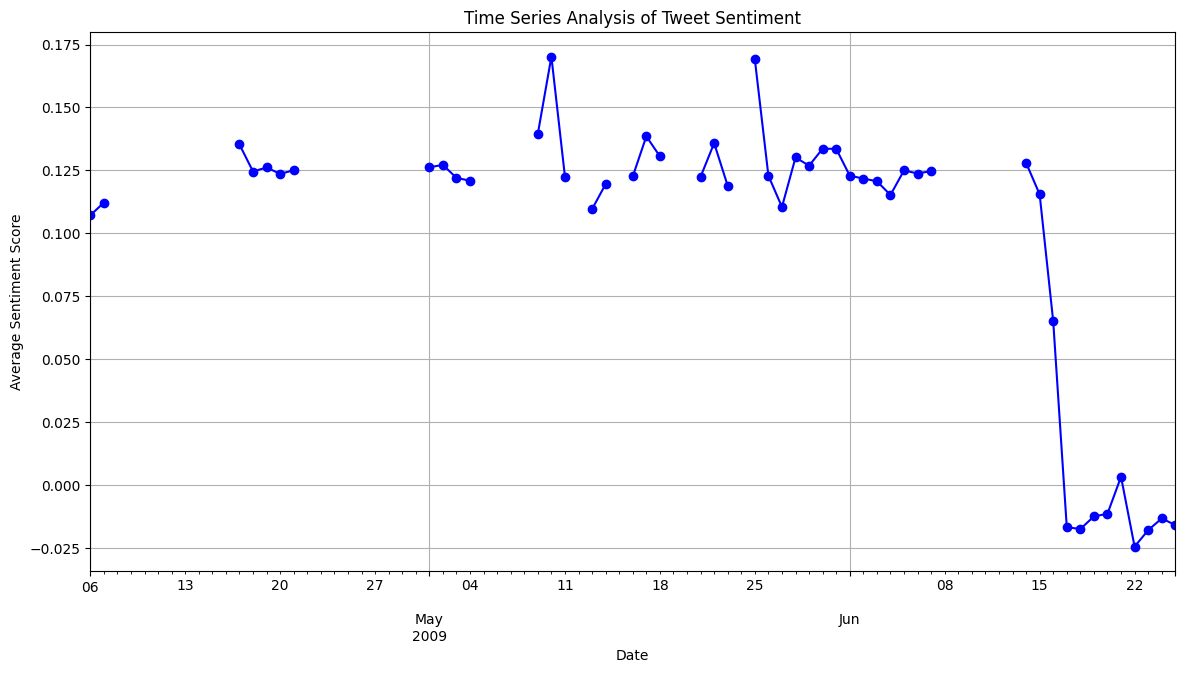

In [25]:
import matplotlib.pyplot as plt

# Group data by date and calculate average sentiment score per day
time_series_data = df.resample('D', on='date')['sentiment_score'].mean()

# Plotting the time series analysis of sentiment scores
plt.figure(figsize=(14, 7))
time_series_data.plot(title='Time Series Analysis of Tweet Sentiment', color='blue', marker='o')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()


In [27]:
#Creating a backup
df1 =df.copy()

In [28]:
df1.head()

ids    tweet_id                date      flag           user  \
0    1  1467810672 2009-04-06 22:19:49  NO_QUERY  scotthamilton   
1    2  1467810917 2009-04-06 22:19:53  NO_QUERY       mattycus   
2    3  1467811184 2009-04-06 22:19:57  NO_QUERY        ElleCTF   
3    4  1467811193 2009-04-06 22:19:57  NO_QUERY         Karoli   
4    5  1467811372 2009-04-06 22:20:00  NO_QUERY       joy_wolf   

                                               tweet  sentiment_score  
0  is upset that he can't update his Facebook by ...            0.000  
1  @Kenichan I dived many times for the ball. Man...            0.500  
2    my whole body feels itchy and like its on fire             0.200  
3  @nationwideclass no, it's not behaving at all....           -0.625  
4                      @Kwesidei not the whole crew             0.200

In [39]:
df =df1.copy()

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1.index = pd.to_datetime(df['Date'], format='%Y-%m-%d')
del btc['Date']

btc.head(5)

In [ ]:
sns.set()
plt.ylabel('Sentiment score')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(btc.index, btc['Close'], )
plt.show()

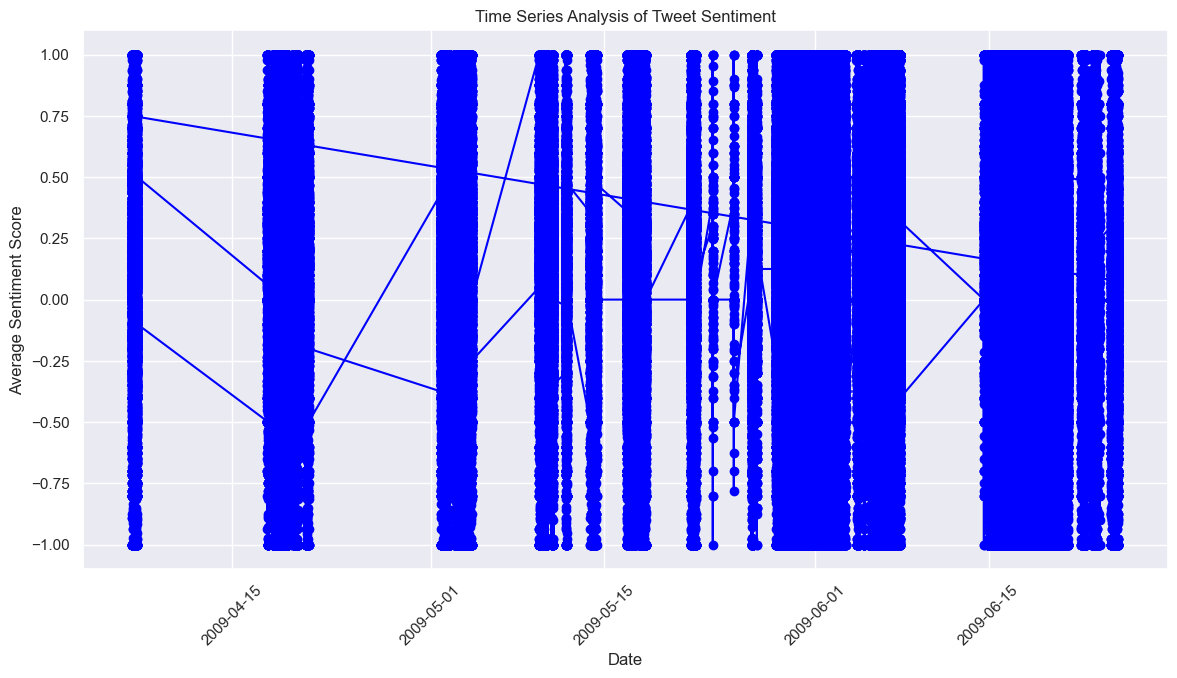

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'date' is in datetime format and set it as the index.
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df.set_index('date', inplace=True)

# Use seaborn for plotting style
sns.set(style="darkgrid")

# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['sentiment_score'], marker='o', linestyle='-', color='blue')
plt.title('Time Series Analysis of Tweet Sentiment')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


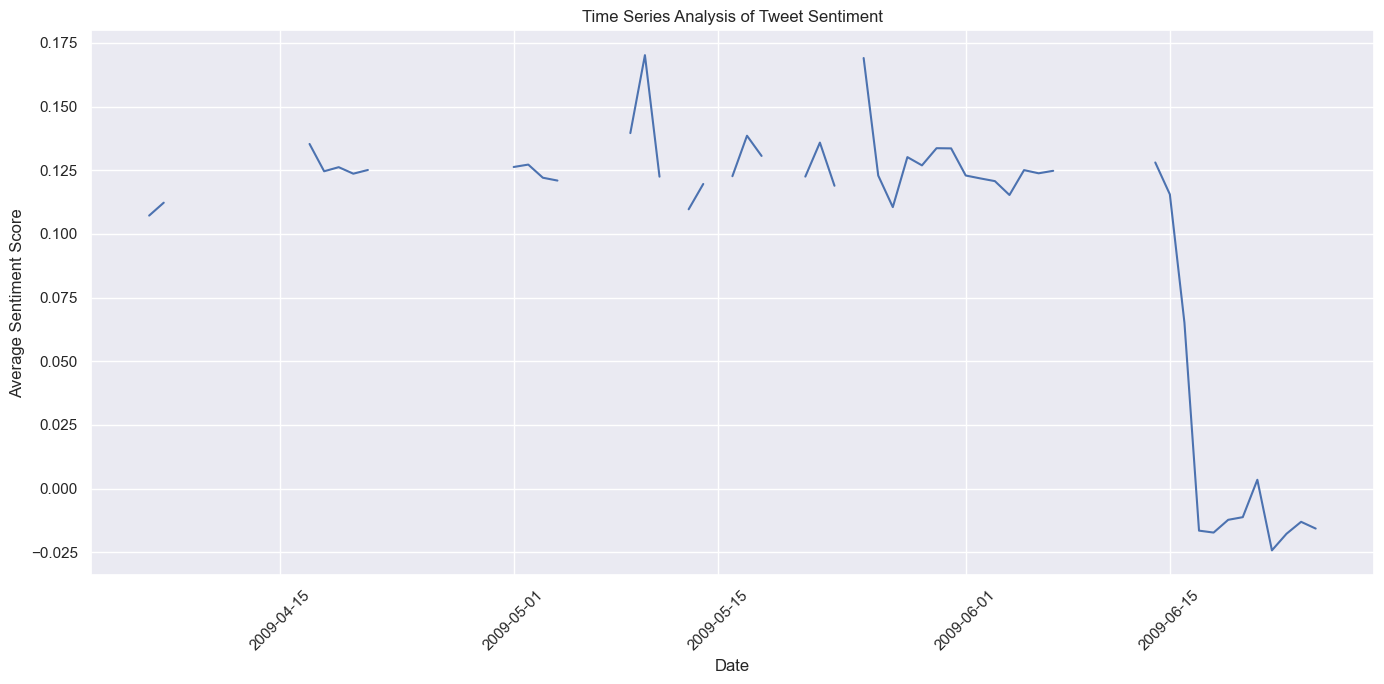

In [40]:
# Formatting date
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Aggregate sentiment scores by date
daily_sentiment = df['sentiment_score'].resample('D').mean()

# Plotting the time series
sns.set(style="darkgrid")
plt.figure(figsize=(14, 7))
plt.plot(daily_sentiment.index, daily_sentiment.values)
plt.title('Time Series Analysis of Tweet Sentiment')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()


In [36]:
df

ids    tweet_id      flag             user  \
date                                                                  
2009-04-06 22:19:49        1  1467810672  NO_QUERY    scotthamilton   
2009-04-06 22:19:53        2  1467810917  NO_QUERY         mattycus   
2009-04-06 22:19:57        3  1467811184  NO_QUERY          ElleCTF   
2009-04-06 22:19:57        4  1467811193  NO_QUERY           Karoli   
2009-04-06 22:20:00        5  1467811372  NO_QUERY         joy_wolf   
...                      ...         ...       ...              ...   
2009-06-16 08:40:49  1598310  2193601966  NO_QUERY  AmandaMarie1028   
2009-06-16 08:40:49  1598311  2193601969  NO_QUERY      TheWDBoards   
2009-06-16 08:40:49  1598312  2193601991  NO_QUERY           bpbabe   
2009-06-16 08:40:49  1598313  2193602064  NO_QUERY     tinydiamondz   
2009-06-16 08:40:50  1598314  2193602129  NO_QUERY   RyanTrevMorris   

                                                                 tweet  \
date                                                                     
2009-04-06 22:19:49  is upset that he can't update his Facebook by ...   
2009-04-06 22:19:53  @Kenichan I dived many times for the ball. Man...   
2009-04-06 22:19:57    my whole body feels itchy and like its on fire    
2009-04-06 22:19:57  @nationwideclass no, it's not behaving at all....   
2009-04-06 22:20:00                      @Kwesidei not the whole crew    
...                                                                ...   
2009-06-16 08:40:49  Just woke up. Having no school is the best fee...   
2009-06-16 08:40:49  TheWDB.com - Very cool to hear old Walt interv...   
2009-06-16 08:40:49  Are you ready for your MoJo Makeover? Ask me f...   
2009-06-16 08:40:49  Happy 38th Birthday to my boo of alll time!!! ...   
2009-06-16 08:40:50  happy #charitytuesday @theNSPCC @SparksCharity...   

                     sentiment_score  
date                                  
2009-04-06 22:19:49            0.000  
2009-04-06 22:19:53            0.500  
2009-04-06 22:19:57            0.200  
2009-04-06 22:19:57           -0.625  
2009-04-06 22:20:00            0.200  
...                              ...  
2009-06-16 08:40:49            1.000  
2009-06-16 08:40:49            0.290  
2009-06-16 08:40:49            0.200  
2009-06-16 08:40:49            1.000  
2009-06-16 08:40:50            0.800  

[1598314 rows x 6 columns]